In [1]:
from sklearn import datasets

iris = datasets.load_iris()

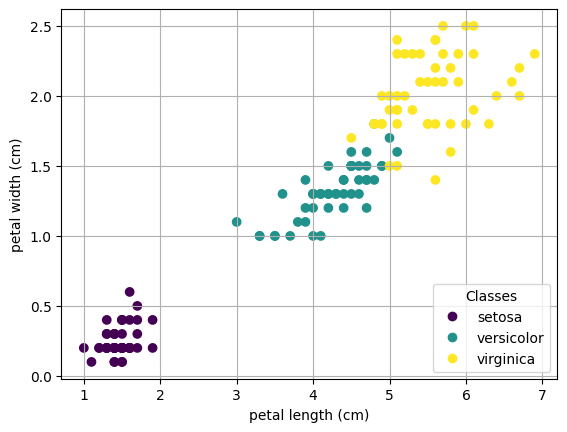

In [2]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
ax.grid(True)

In [3]:
from sklearn.model_selection import train_test_split

# TODO : add seed here
import numpy
numpy.random.seed(42)

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [4]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
accuracy = numpy.mean(y_test == clf.predict(X_test))
print(f'Accuracy in test set = {accuracy}')

Accuracy in test set = 0.9238095238095239


<Axes: ylabel='Mean accuracy decrease'>

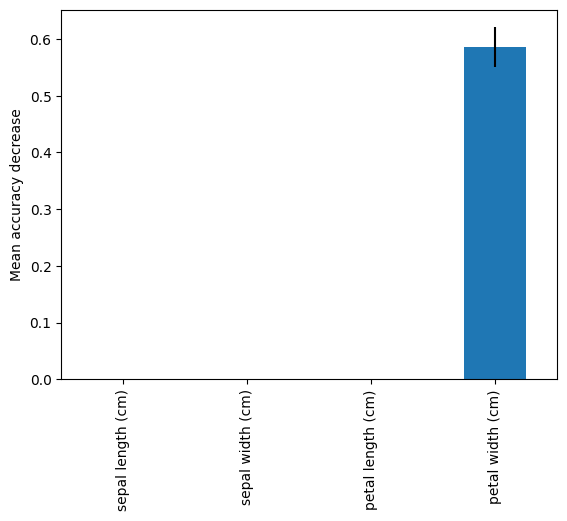

In [6]:
import pandas
from sklearn.inspection import permutation_importance

results = permutation_importance(clf, X_test, y_test, scoring='accuracy', n_repeats=50, random_state=42)

forest_importances = pandas.Series(results.importances_mean, index=iris.feature_names)
forest_importances.plot.bar(yerr=results.importances_std, ylabel='Mean accuracy decrease')

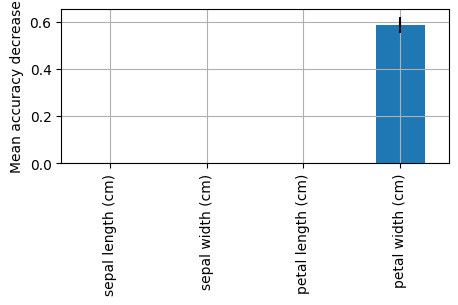

In [7]:
fig = plt.figure(figsize=(5, 2))
ax = fig.add_subplot(111)
forest_importances.plot.bar(yerr=results.importances_std, ylabel='Mean accuracy decrease', ax=ax)
ax.grid(True)